In [1]:
%ls

data_exploration.ipynb  jpy-dev/


In [141]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

# Data Load

In [85]:
wind_crk = pd.read_excel("../data/RWE_creek.xlsx", sheet_name="Sheet1")
desc = pd.read_excel("../data/RWE_creek.xlsx", sheet_name="Sheet2")
wind_crk["TTimeStamp"]= pd.to_datetime(wind_crk["TTimeStamp"],format='%Y-%m-%d %H:%M:%S.%f', errors="raise")

In [7]:
wind_crk.info()  

<class 'pandas.DataFrame'>
RangeIndex: 157464 entries, 0 to 157463
Data columns (total 36 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   TURBINE_ID                           157464 non-null  str           
 1   TTimeStamp                           157464 non-null  datetime64[us]
 2   Gen_RPM_Avg                          157464 non-null  float64       
 3   Gen_Bear_Temp_Avg                    157464 non-null  float64       
 4   Gen_Phase1_Temp_Avg                  157464 non-null  float64       
 5   Gen_Phase2_Temp_Avg                  157464 non-null  float64       
 6   Gen_Phase3_Temp_Avg                  157464 non-null  float64       
 7   Amb_WindSpeed_Max                    157464 non-null  float64       
 8   Amb_WindSpeed_Min                    157464 non-null  float64       
 9   Amb_WindSpeed_Avg                    157464 non-null  float64       
 10  Amb_Win

In [86]:
wind_crk

,TURBINE_ID,TTimeStamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,...,HCnt_Avg_GrdOk,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo
0,T001,2018-09-15 00:10:00,131.1,35,35,35,35,2.4,1.6,2.1,...,600,600,600,0,0,0,0,600,0,0
1,T001,2018-09-15 00:20:00,144.7,34,35,35,35,2.6,1.7,2.3,...,600,600,600,0,0,0,0,600,0,0
2,T001,2018-09-15 00:30:00,155.7,34,35,35,35,2.6,2.0,2.4,...,600,600,600,0,0,33,0,600,0,0
3,T001,2018-09-15 00:40:00,144.0,34,35,35,35,2.6,2.0,2.3,...,600,600,600,0,0,38,0,600,0,0
4,T001,2018-09-15 00:50:00,124.2,34,35,35,35,2.2,1.7,2.0,...,600,600,600,0,0,24,0,600,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157459,T013,2018-12-07 13:10:00,1060.1,48,70,71,71,8.1,5.3,6.8,...,600,600,600,600,0,0,0,600,600,0
157460,T013,2018-12-07 13:20:00,1060.0,48,70,71,71,8.9,5.7,6.8,...,600,600,600,600,0,25,0,600,600,0
157461,T013,2018-12-07 13:30:00,1044.3,48,70,72,71,8.4,5.3,6.7,...,600,600,600,600,0,0,0,600,600,0
157462,T013,2018-12-07 13:40:00,1031.1,48,70,71,71,8.2,4.7,6.4,...,600,600,600,600,0,0,0,600,600,0


In [26]:
wind_crk.iloc[:,20:].head(10)

,Grd_Prod_PsblePwr_Avg,Grd_Sets_ActPwr_ReferenceValue10Min,Grd_Prod_Pwr_InternalDerateStat,Grd_Prod_Pwr_InternalDerateTime,HCnt_Avg_Tot,HCnt_Avg_GrdOn,HCnt_Avg_GrdOk,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo
0,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
1,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
2,0.000000,0.0,0,0,600,600,600,600,600,0,0,33,0,600,0,0
3,0.000000,0.0,0,0,600,600,600,600,600,0,0,38,0,600,0,0
4,0.000000,0.0,0,0,600,600,600,600,600,0,0,24,0,600,0,0
5,0.000000,0.0,0,0,600,600,600,600,600,0,0,35,0,600,0,0
6,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
7,0.000000,0.0,0,0,600,600,600,600,600,0,0,0,0,600,0,0
8,1.542700,0.0,0,0,600,600,600,600,600,0,0,27,0,600,0,0
9,17.300275,0.0,0,0,600,600,600,600,600,0,0,29,0,600,0,0


## Data type enforcing

In [87]:
dtype_mapping = {"Gen_Bear_Temp_Avg": float,
                 "Gen_Phase1_Temp_Avg": float,
                 "Gen_Phase2_Temp_Avg": float,
                 "Gen_Phase3_Temp_Avg": float,
                 "Amb_Temp_Avg":float,
                 "Cont_VCP_ChokcoilTemp_Avg":float}
wind_crk= wind_crk.astype(dtype_mapping)

## Basic timeseries check and cleaning

In [88]:
# Dedup timestamps basic based on turbine
# Remove duplicates within each turbine group
def remove_duplicate_timestamps(df, timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                               keep='first'):
    """
    Remove duplicate timestamps within each turbine group.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Your dataset
    timestamp_col : str
        Name of the timestamp column
    turbine_col : str
        Name of the turbine ID column
    keep : str
        Which duplicate to keep: 'first', 'last', or False (remove all duplicates)
    
    Returns:
    --------
    df_cleaned : DataFrame with duplicates removed
    duplicate_info : DataFrame with information about removed duplicates
    """
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    print(f"Total rows before cleaning: {len(df)}")
    
    # Find duplicates within each turbine group
    duplicate_info = []
    df_cleaned_list = []
    
    for turbine_id in sorted(df[turbine_col].unique()):
        turbine_data = df[df[turbine_col] == turbine_id].copy()
        
        # Find duplicates for this turbine
        duplicates_mask = turbine_data.duplicated(subset=[timestamp_col], keep=False)
        n_duplicates = duplicates_mask.sum()
        
        if n_duplicates > 0:
            print(f"Turbine {turbine_id}: {n_duplicates} duplicate timestamp rows")
            duplicate_info.append({
                'turbine_id': turbine_id,
                'duplicate_rows': n_duplicates,
                'unique_duplicate_timestamps': turbine_data[duplicates_mask][timestamp_col].nunique()
            })
        
        # Remove duplicates for this turbine
        turbine_cleaned = turbine_data.drop_duplicates(subset=[timestamp_col], keep=keep)
        df_cleaned_list.append(turbine_cleaned)
    
    # Combine all cleaned turbine data
    df_cleaned = pd.concat(df_cleaned_list, ignore_index=True)
    df_cleaned = df_cleaned.sort_values([turbine_col, timestamp_col])
    
    print(f"\nTotal rows after cleaning: {len(df_cleaned)}")
    print(f"Rows removed: {len(df) - len(df_cleaned)}")
    
    duplicate_summary = pd.DataFrame(duplicate_info) if duplicate_info else None
    
    return df_cleaned, duplicate_summary

In [99]:
wind_crk_clean, dup_summary = remove_duplicate_timestamps(wind_crk)  # dedup and reports
dup_summary

Total rows before cleaning: 157464
Turbine T006: 1998 duplicate timestamp rows
Turbine T009: 1998 duplicate timestamp rows

Total rows after cleaning: 155466
Rows removed: 1998


,turbine_id,duplicate_rows,unique_duplicate_timestamps
0,T006,1998,999
1,T009,1998,999


In [93]:
# show all turbines min/max timestamp *** Help to make a decision for consistent transformation time frame
for turb in sorted(wind_crk.TURBINE_ID.unique().tolist()):
    startt = wind_crk.loc[wind_crk.TURBINE_ID==turb]['TTimeStamp'].min()
    endt = wind_crk.loc[wind_crk.TURBINE_ID==turb]['TTimeStamp'].max()
    print(turb, startt, endt)

T001 2018-09-15 00:10:00 2018-12-07 13:40:00
T002 2018-09-15 00:10:00 2018-12-07 13:40:00
T003 2018-09-15 00:10:00 2018-12-07 13:50:00
T004 2018-09-15 00:10:00 2018-12-07 13:50:00
T005 2018-09-15 00:10:00 2018-12-07 13:50:00
T006 2018-09-15 00:10:00 2018-12-07 13:50:00
T007 2018-09-15 00:10:00 2018-12-07 13:50:00
T008 2018-09-15 00:10:00 2018-12-07 13:50:00
T009 2018-09-15 00:10:00 2018-12-07 13:50:00
T010 2018-09-15 00:10:00 2018-12-07 13:50:00
T011 2018-09-15 00:10:00 2018-12-07 13:50:00
T012 2018-09-15 00:10:00 2018-12-07 13:50:00
T013 2018-09-15 00:10:00 2018-12-07 13:50:00


In [105]:
## Make sure all end timestamp aligns
wind_crk_clean = wind_crk_clean.loc[wind_crk_clean['TTimeStamp']<= datetime.strptime('2018-12-07 13:40:00', '%Y-%m-%d %H:%M:%S')]

In [115]:
# total count of timestamp sample

print("Time span between:", wind_crk_clean['TTimeStamp'].min(), wind_crk_clean['TTimeStamp'].max())
ttt = (wind_crk_clean['TTimeStamp'].max() - wind_crk_clean['TTimeStamp'].min())
count_tt = ttt.days*24*6+(ttt.seconds//600)+1
print("timestamp count per turbine:", count_tt)
count_tb_tt = wind_crk_clean.groupby('TURBINE_ID').size()
print(count_tb_tt)


Time span between: 2018-09-15 00:10:00 2018-12-07 13:40:00
timestamp count per turbine: 12034
TURBINE_ID
T001    11964
T002    11964
T003    11963
T004    11964
T005    11963
T006    11949
T007    11960
T008    11959
T009    11915
T010    11964
T011    11963
T012    11964
T013    11963
dtype: int64


In [21]:
def plot_timeseries(df, column_to_plot, timestamp_col='TTimeStamp', 
                    turbine_col='TURBINE_ID', figsize=(12, 6)):
    """
    Simple overlay plot of time series data grouped by turbine ID.
    """
    # Prepare data
    df = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df[timestamp_col]):
        df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    
    df_sorted = df.sort_values(timestamp_col)
    
    # Get sorted unique turbine IDs
    turbine_ids = sorted(df_sorted[turbine_col].unique())
    
    
    # Create plot
    plt.figure(figsize=figsize)

    # Create color map - consistent colors for each turbine
    colors = plt.cm.tab10(range(len(turbine_ids)))
    color_map = dict(zip(turbine_ids, colors))
    
    for turbine_id in turbine_ids:
        turbine_data = df_sorted[df_sorted[turbine_col] == turbine_id]
        plt.plot(turbine_data[timestamp_col], 
                 turbine_data[column_to_plot],
                 label=f'Turbine {turbine_id}',
                 color=color_map[turbine_id])
    
    plt.xlabel('Timestamp')
    plt.ylabel(column_to_plot)
    plt.title(f'{column_to_plot} over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


In [142]:
# check timestamp gaps 
def detect_missing_timestamps(df, timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                             freq='10min', fill_missing=False, 
                             show_summary=True, show_details=False):
    """
    Detect missing timestamps in time series data grouped by turbine.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Your dataset
    timestamp_col : str
        Name of the timestamp column
    turbine_col : str
        Name of the turbine ID column
    freq : str
        Expected frequency of timestamps using pandas offset aliases:
        - '10s', '30s' (seconds)
        - '5min', '10min' (minutes)
        - '1h' (hours)
        - '1D' (calendar day)
    fill_missing : bool
        If True, fill in missing timestamps with null values for other columns
    show_summary : bool
        If True, print summary of missing timestamps
    show_details : bool
        If True, print detailed list of missing timestamps for each turbine
    
    Returns:
    --------
    df_result : DataFrame (original or with filled timestamps)
    missing_summary : DataFrame with summary of missing timestamps per turbine
    missing_details : dict with detailed missing timestamp info per turbine
    """
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    df = df.sort_values([turbine_col, timestamp_col])
    
    missing_summary_list = []
    missing_details_dict = {}
    df_filled_list = []
    
    for turbine_id in sorted(df[turbine_col].unique()):
        turbine_data = df[df[turbine_col] == turbine_id].copy()
        turbine_data = turbine_data.sort_values(timestamp_col)
        
        # Get the time range for this turbine
        min_time = turbine_data[timestamp_col].min()
        max_time = turbine_data[timestamp_col].max()
        
        # Create complete timestamp range
        expected_timestamps = pd.date_range(start=min_time, end=max_time, freq=freq)
        
        # Find missing timestamps
        existing_timestamps = set(turbine_data[timestamp_col])
        missing_timestamps = [ts for ts in expected_timestamps if ts not in existing_timestamps]
        
        n_expected = len(expected_timestamps)
        n_existing = len(existing_timestamps)
        n_missing = len(missing_timestamps)
        pct_missing = (n_missing / n_expected * 100) if n_expected > 0 else 0
        
        # Store summary
        missing_summary_list.append({
            'turbine_id': turbine_id,
            'start_time': min_time,
            'end_time': max_time,
            'expected_records': n_expected,
            'actual_records': n_existing,
            'missing_records': n_missing,
            'missing_pct': round(pct_missing, 2)
        })
        
        # Store details
        missing_details_dict[turbine_id] = sorted(missing_timestamps)
        
        # Fill missing timestamps if requested
        if fill_missing and n_missing > 0:
            # Create dataframe with missing timestamps
            missing_df = pd.DataFrame({timestamp_col: missing_timestamps})
            missing_df[turbine_col] = turbine_id
            
            # Add null columns for all other columns in original data
            for col in turbine_data.columns:
                if col not in [timestamp_col, turbine_col]:
                    missing_df[col] = np.nan
            
            # Combine with existing data
            turbine_filled = pd.concat([turbine_data, missing_df], ignore_index=True)
            turbine_filled = turbine_filled.sort_values(timestamp_col)
            df_filled_list.append(turbine_filled)
        else:
            df_filled_list.append(turbine_data)
    
    # Create summary dataframe
    missing_summary = pd.DataFrame(missing_summary_list)
    
    # Print summary if requested
    if show_summary:
        print("=" * 80)
        print("MISSING TIMESTAMPS SUMMARY")
        print("=" * 80)
        print(f"Expected frequency: {freq}")
        print()
        print(missing_summary.to_string(index=False))
        print()
        print(f"Total expected records across all turbines: {missing_summary['expected_records'].sum()}")
        print(f"Total actual records: {missing_summary['actual_records'].sum()}")
        print(f"Total missing records: {missing_summary['missing_records'].sum()}")
        print(f"Overall missing percentage: {missing_summary['missing_records'].sum() / missing_summary['expected_records'].sum() * 100:.2f}%")
    
    # Print details if requested
    if show_details:
        print("\n" + "=" * 80)
        print("DETAILED MISSING TIMESTAMPS")
        print("=" * 80)
        for turbine_id, missing_times in missing_details_dict.items():
            if len(missing_times) > 0:
                print(f"\nTurbine {turbine_id}: {len(missing_times)} missing timestamps")
                if len(missing_times) <= 20:
                    for ts in missing_times:
                        print(f"  {ts}")
                else:
                    print(f"  First 10:")
                    for ts in missing_times[:10]:
                        print(f"    {ts}")
                    print(f"  ...")
                    print(f"  Last 10:")
                    for ts in missing_times[-10:]:
                        print(f"    {ts}")
    
    # Combine all turbine data
    df_result = pd.concat(df_filled_list, ignore_index=True)
    df_result = df_result.sort_values([turbine_col, timestamp_col])
    
    if fill_missing:
        print(f"\n✓ Missing timestamps filled. DataFrame now has {len(df_result)} rows (was {len(df)})")
    
    return df_result, missing_summary, missing_details_dict


# Helper function: Find gaps (consecutive missing periods)
def find_timestamp_gaps(df, timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                       freq='10T', min_gap_size=2):
    """
    Find gaps (consecutive missing timestamps) in the time series.
    
    Parameters:
    -----------
    min_gap_size : int
        Minimum number of consecutive missing timestamps to report as a gap
    
    Returns:
    --------
    gaps_df : DataFrame with start_time, end_time, and duration of each gap
    """
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    df = df.sort_values([turbine_col, timestamp_col])
    
    gaps_list = []
    
    for turbine_id in sorted(df[turbine_col].unique()):
        turbine_data = df[df[turbine_col] == turbine_id].copy()
        turbine_data = turbine_data.sort_values(timestamp_col)
        
        # Get time range
        min_time = turbine_data[timestamp_col].min()
        max_time = turbine_data[timestamp_col].max()
        
        # Create expected range
        expected_timestamps = pd.date_range(start=min_time, end=max_time, freq=freq)
        existing_timestamps = set(turbine_data[timestamp_col])
        missing_timestamps = sorted([ts for ts in expected_timestamps if ts not in existing_timestamps])
        
        # Find consecutive gaps
        if len(missing_timestamps) > 0:
            gap_start = missing_timestamps[0]
            gap_end = missing_timestamps[0]
            gap_count = 1
            
            for i in range(1, len(missing_timestamps)):
                # Check if this timestamp is consecutive to the previous
                expected_next = gap_end + pd.Timedelta(freq)
                if missing_timestamps[i] == expected_next:
                    gap_end = missing_timestamps[i]
                    gap_count += 1
                else:
                    # Gap ended, record it if it meets minimum size
                    if gap_count >= min_gap_size:
                        gaps_list.append({
                            'turbine_id': turbine_id,
                            'gap_start': gap_start,
                            'gap_end': gap_end,
                            'missing_records': gap_count,
                            'duration': gap_end - gap_start
                        })
                    # Start new gap
                    gap_start = missing_timestamps[i]
                    gap_end = missing_timestamps[i]
                    gap_count = 1
            
            # Record the last gap if it meets minimum size
            if gap_count >= min_gap_size:
                gaps_list.append({
                    'turbine_id': turbine_id,
                    'gap_start': gap_start,
                    'gap_end': gap_end,
                    'missing_records': gap_count,
                    'duration': gap_end - gap_start
                })
    
    gaps_df = pd.DataFrame(gaps_list) if gaps_list else pd.DataFrame()

    if len(gaps_df) > 0:
        print("=" * 80)
        print(f"DATA GAPS (consecutive missing periods of {min_gap_size}+ records)")
        print("=" * 80)
        print(gaps_df.to_string(index=False))
        print(f"\nTotal gaps found: {len(gaps_df)}")
    else:
        print(f"No gaps of {min_gap_size}+ consecutive missing records found.")
    
    return gaps_df

wind_crk_res, missing_summary, missing_details_dict = detect_missing_timestamps(wind_crk_clean, fill_missing=True)

MISSING TIMESTAMPS SUMMARY
Expected frequency: 10min

turbine_id          start_time            end_time  expected_records  actual_records  missing_records  missing_pct
      T001 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11964               70         0.58
      T002 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11964               70         0.58
      T003 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11963               71         0.59
      T004 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11964               70         0.58
      T005 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11963               71         0.59
      T006 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11949               85         0.71
      T007 2018-09-15 00:10:00 2018-12-07 13:40:00             12034           11960               74         0.61
      T008 2018-09-15 00:1

In [143]:
print(missing_details_dict.get("T001")[0:5], missing_details_dict.get("T001")[-5:])

[Timestamp('2018-09-28 12:50:00'), Timestamp('2018-09-28 13:00:00'), Timestamp('2018-09-28 13:10:00'), Timestamp('2018-09-28 13:20:00'), Timestamp('2018-09-28 13:30:00')] [Timestamp('2018-09-28 23:40:00'), Timestamp('2018-09-28 23:50:00'), Timestamp('2018-09-29 00:00:00'), Timestamp('2018-09-29 00:10:00'), Timestamp('2018-09-29 00:20:00')]


## Take a glance at missing timestamp gas and which turbines had this problem in a quick view using Counters AVG TOTAL

This can be easiliy minorly clean up and scaled to a view for monitoring

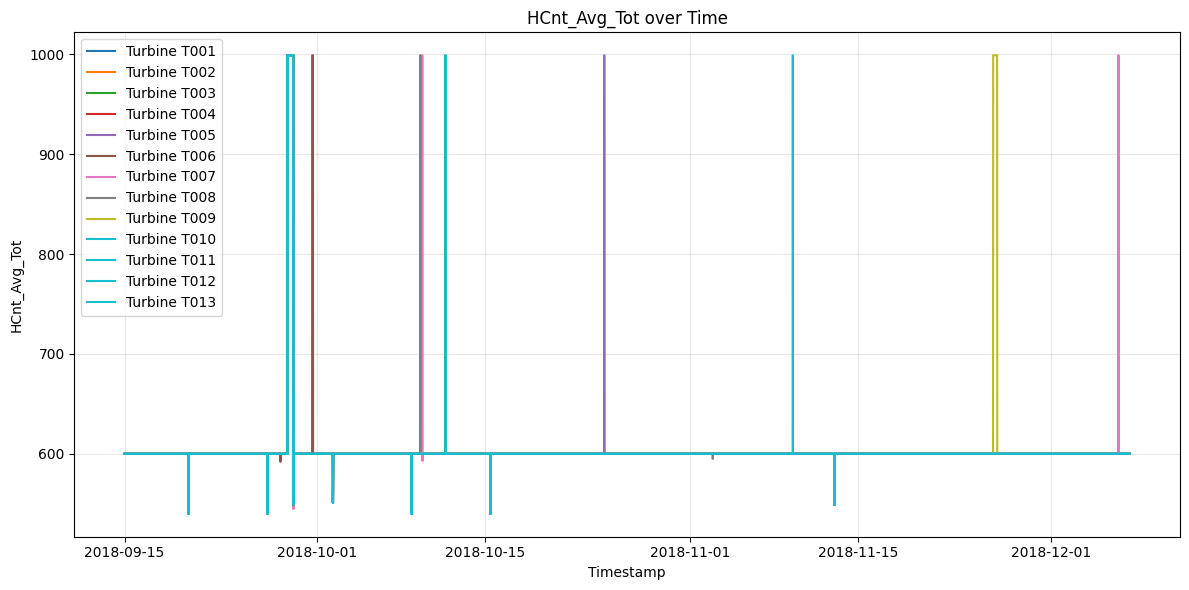

In [148]:
plot_timeseries(wind_crk_res.fillna(999),"HCnt_Avg_Tot")

## Closer look on the counters values

In [154]:
# check counters value

threshold = 420 # 0.7hr as threshold 

counters_cols = [x for x in wind_crk_res.columns.values.tolist() if "HCnt" in x]
print("Missing count below:", threshold) 
for ctrs_col in counters_cols:
    if len(wind_crk_res[ctrs_col].unique().tolist()) > 1:
        all_counts = sorted(wind_crk_res[ctrs_col].unique().tolist())
        blw_thre = [x for x in all_counts if x<= threshold]
        print(ctrs_col, "total hr increments:", len(blw_thre))

Missing count below: 420
HCnt_Avg_Tot total hr increments: 0
HCnt_Avg_GrdOn total hr increments: 4
HCnt_Avg_GrdOk total hr increments: 67
HCnt_Avg_TrbOk total hr increments: 125
HCnt_Avg_Run total hr increments: 232
HCnt_Avg_Gen1 total hr increments: 421
HCnt_Avg_Gen2 total hr increments: 421
HCnt_Avg_Yaw total hr increments: 376
HCnt_Avg_SrvOn total hr increments: 58
HCnt_Avg_AmbOk total hr increments: 138
HCnt_Avg_WindOk total hr increments: 421


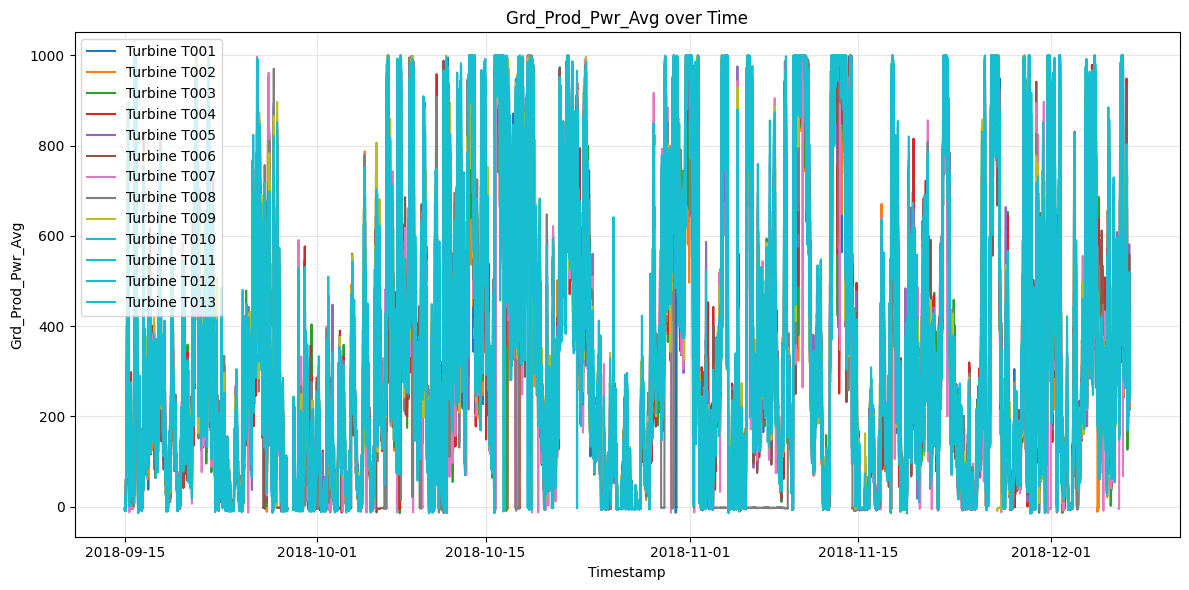

In [145]:
# plot some generation values by turbine and take a look 
plot_timeseries(wind_crk_res, "Grd_Prod_Pwr_Avg")

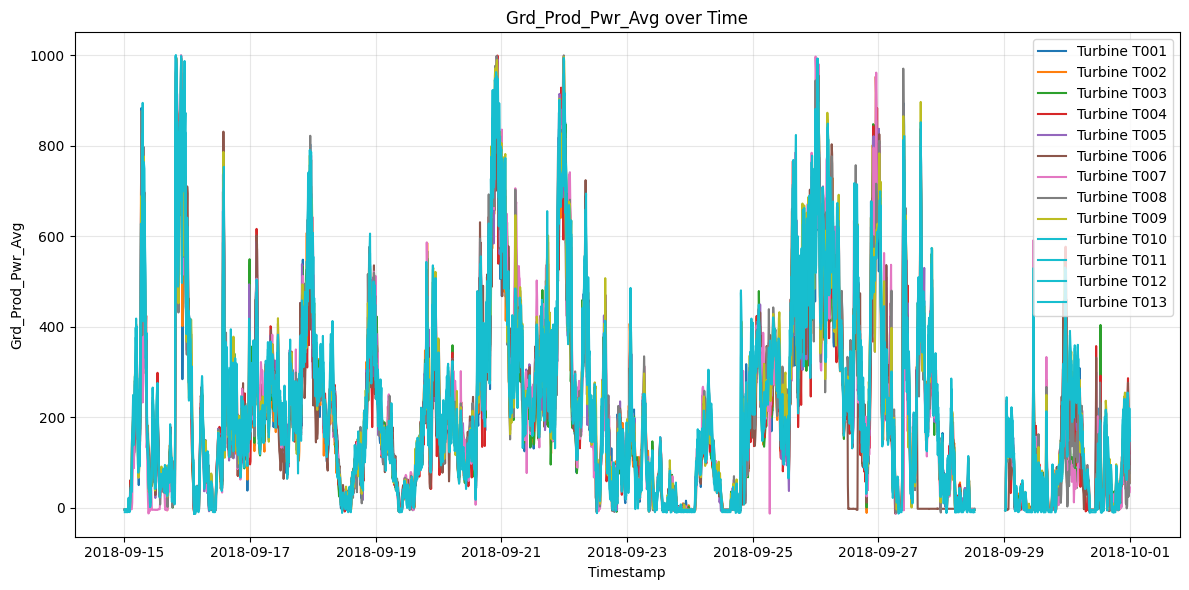

In [146]:
# look at a shorter time frame
start_date = '2018-09-15'
end_date = '2018-10-01'
df_filtered = wind_crk_res[(wind_crk_res['TTimeStamp'] >= start_date) & (wind_crk_res['TTimeStamp'] <= end_date)]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

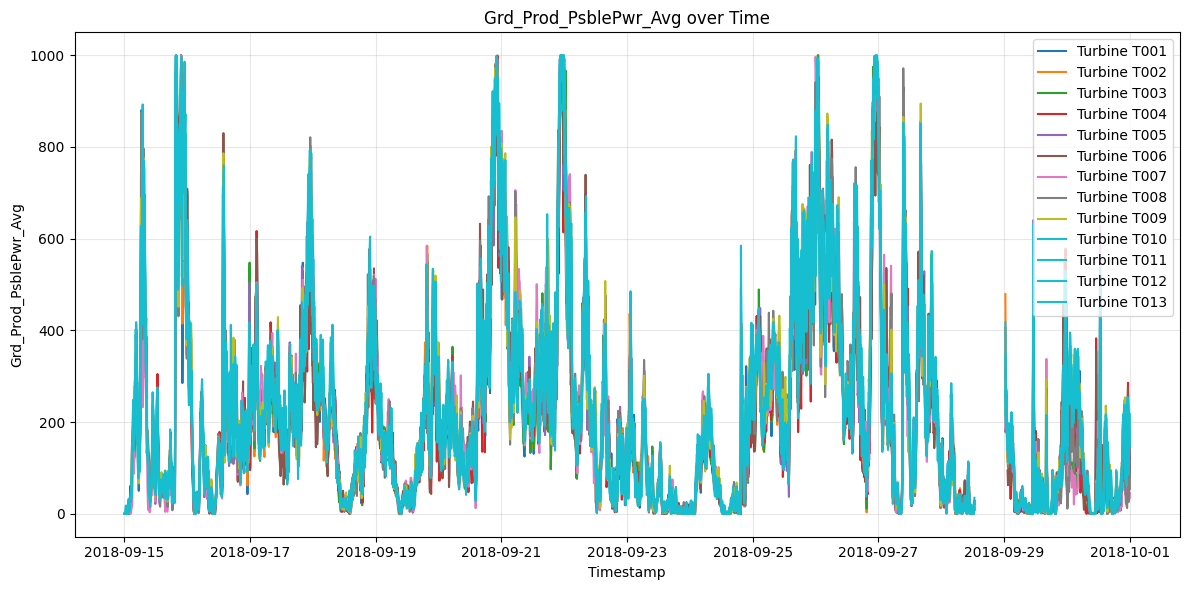

In [147]:
plot_timeseries(df_filtered, "Grd_Prod_PsblePwr_Avg")

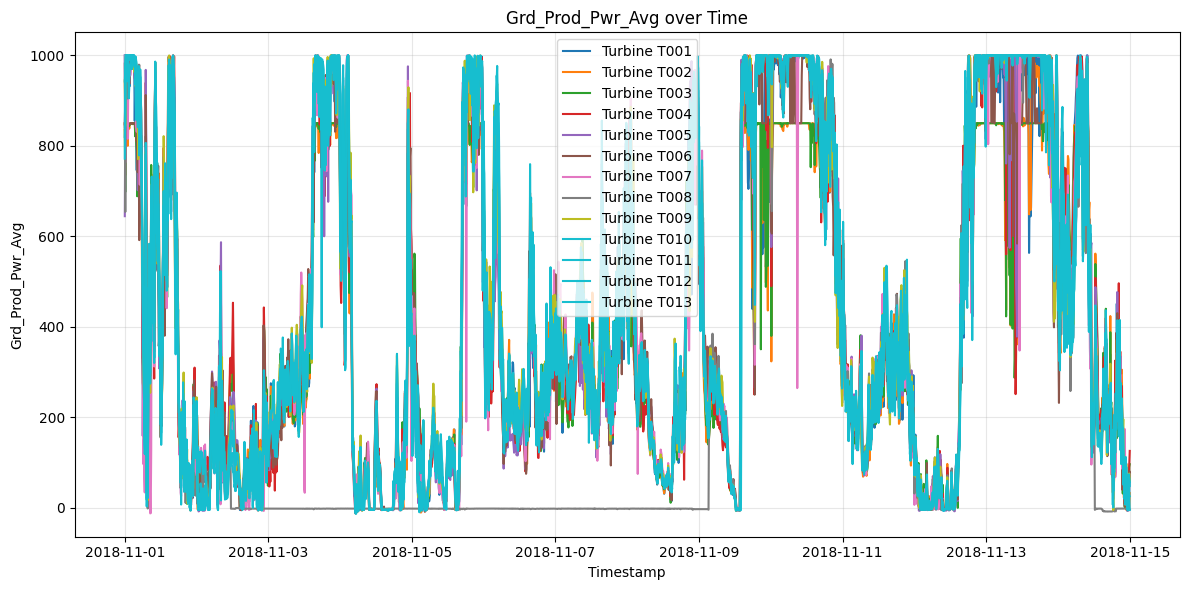

In [155]:
# look at a shorter time frame
start_date = '2018-11-01'
end_date = '2018-11-15'
df_filtered = wind_crk_res[(wind_crk_res['TTimeStamp'] >= start_date) & (wind_crk_res['TTimeStamp'] <= end_date)]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

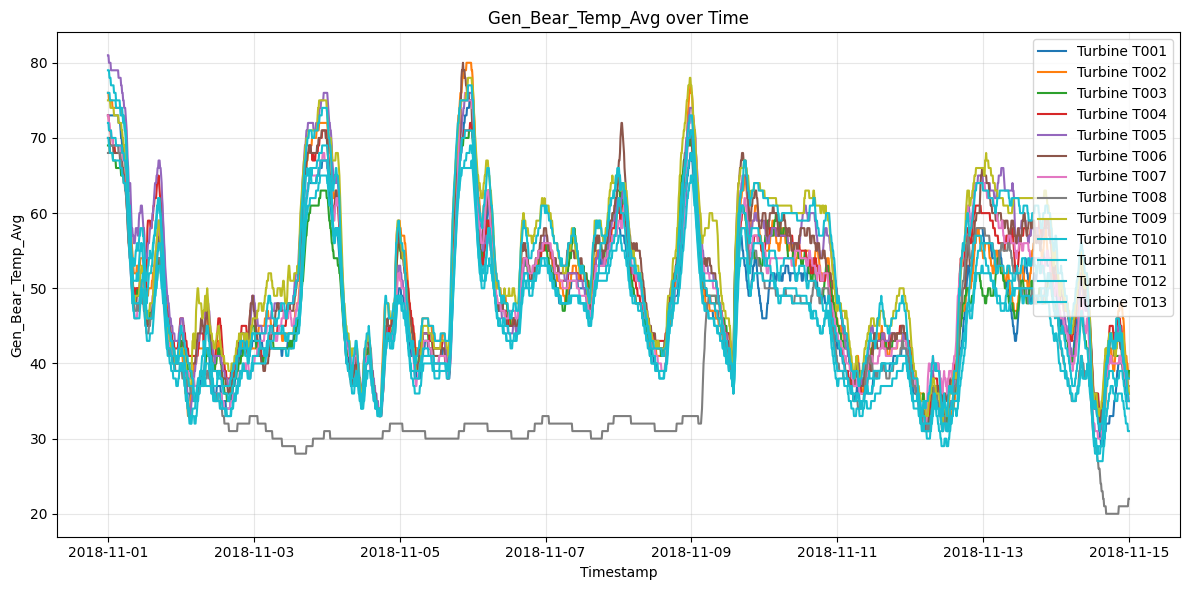

In [181]:
plot_timeseries(df_filtered, "Gen_Bear_Temp_Avg") # check against Gen_Bear_Temp_Avg

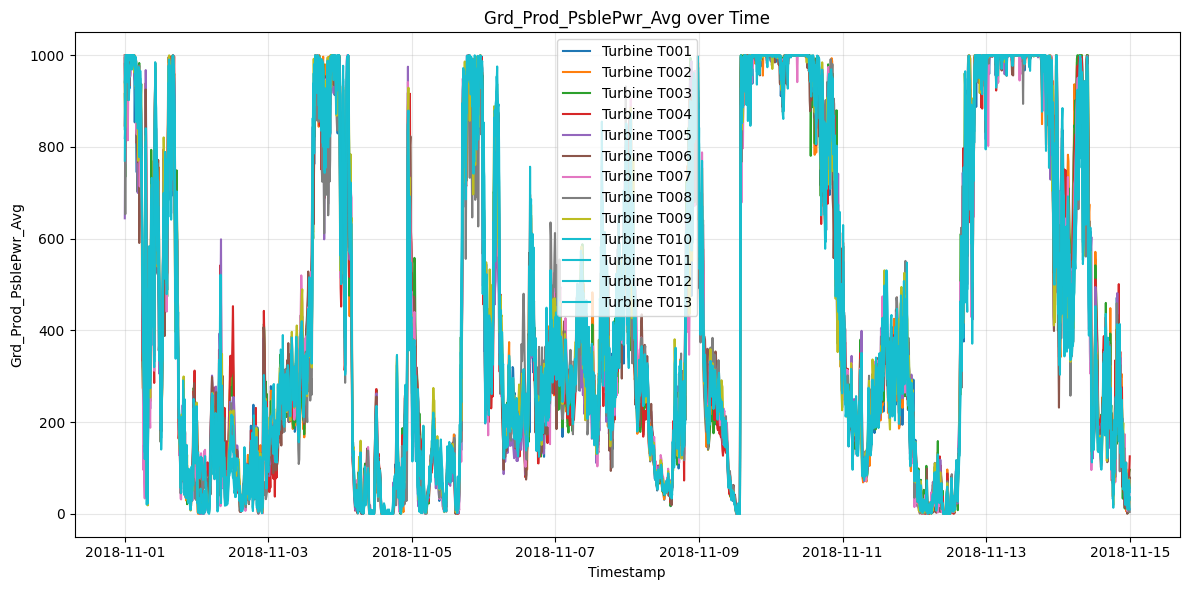

In [156]:
plot_timeseries(df_filtered, "Grd_Prod_PsblePwr_Avg")

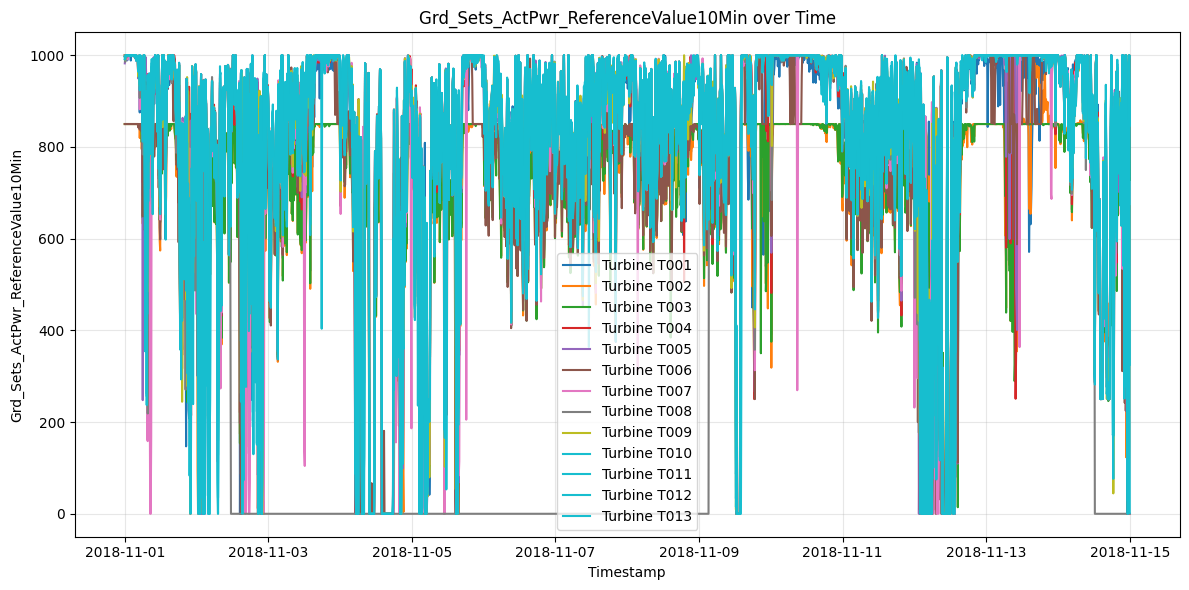

In [184]:
plot_timeseries(df_filtered, "Grd_Sets_ActPwr_ReferenceValue10Min") # check against AP setpoint

In [52]:
# strap comparison of each turbine, their difference on pwr gen
def add_difference_column(df, column1, column2, new_column_name='diff_pwr',
                         difference_type='absolute', turbine_col='TURBINE_ID'):
    """
    Add a difference column to the dataframe, preserving grouping by turbine.
    
    Parameters:
    -----------
    difference_type : str
        - 'absolute': column1 - column2
        - 'relative': (column1 - column2) / column2 * 100
        - 'ratio': column1 / column2
    """
    df = df.copy()
    
    if difference_type == 'absolute':
        df[new_column_name] = df[column1] - df[column2]
    elif difference_type == 'relative':
        df[new_column_name] = (df[column1] - df[column2]) / df[column2] * 100
    elif difference_type == 'ratio':
        df[new_column_name] = df[column1] / df[column2]
    else:
        raise ValueError("difference_type must be 'absolute', 'relative', or 'ratio'")
    
    return df
# create a plotting schem to examine the diff timeseries

def plot_difference_column(df, turbine_ids, diff_column, 
                          timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                          start_date=None, end_date=None,
                          figsize=(14, 10), ylabel=None, title=None):
    """
    Plot a pre-calculated difference column for selected turbines.
    Each turbine gets its own subplot showing the difference over time.
    
    Parameters:
    -----------
    df : pandas DataFrame
        Your dataset (should already have the difference column calculated)
    turbine_ids : list
        List of turbine IDs to plot (e.g., [1, 2, 3])
    diff_column : str
        Name of the difference column to plot
    timestamp_col : str
        Name of the timestamp column
    turbine_col : str
        Name of the turbine ID column
    start_date : str, optional
        Start date for filtering
    end_date : str, optional
        End date for filtering
    figsize : tuple
        Figure size
    ylabel : str, optional
        Custom y-axis label (default: uses diff_column name)
    title : str, optional
        Custom overall title (default: auto-generated)
    """
    # Prepare data
    df = df.sort_values([turbine_col, timestamp_col])
    
    # Check if difference column exists
    if diff_column not in df.columns:
        raise ValueError(f"Column '{diff_column}' not found in dataframe. "
                        f"Please use add_difference_column() first.")
    
    # Filter by date range if provided
    if start_date:
        df = df[df[timestamp_col] >= start_date]
    if end_date:
        df = df[df[timestamp_col] <= end_date]
    
    # Filter for selected turbines only
    df = df[df[turbine_col].isin(turbine_ids)]
    
    # Calculate number of rows and columns for subplots
    n_turbines = len(turbine_ids)
    n_cols = 2 if n_turbines > 1 else 1
    n_rows = (n_turbines + n_cols - 1) // n_cols  # Ceiling division
    
    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=True)
    
    # Handle case of single subplot
    if n_turbines == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Get consistent colors for turbines
    colors = plt.cm.tab10(range(len(turbine_ids)))
    color_map = dict(zip(sorted(turbine_ids), colors))
    
    # Default labels
    y_label = ylabel if ylabel else diff_column
    plot_title = title if title else f'{diff_column} by Turbine'
    
    # Plot each turbine
    for idx, turbine_id in enumerate(sorted(turbine_ids)):
        turbine_data = df[df[turbine_col] == turbine_id].copy()
        
        if len(turbine_data) == 0:
            axes[idx].text(0.5, 0.5, f'No data for Turbine {turbine_id}',
                          ha='center', va='center', transform=axes[idx].transAxes)
            axes[idx].set_title(f'Turbine {turbine_id}')
            continue
        
        # Plot difference column
        axes[idx].plot(turbine_data[timestamp_col], turbine_data[diff_column],
                      color=color_map[turbine_id], linewidth=1.5, alpha=0.8)
        axes[idx].axhline(y=0, color='red', linestyle='--', alpha=0.5, linewidth=1)
        axes[idx].set_title(f'Turbine {turbine_id}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(y_label, fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        
        # Print statistics for this turbine
        print(f"\nTurbine {turbine_id} Statistics ({diff_column}):")
        print(f"  Mean: {turbine_data[diff_column].mean():.4f}")
        print(f"  Std: {turbine_data[diff_column].std():.4f}")
        print(f"  Min: {turbine_data[diff_column].min():.4f}")
        print(f"  Max: {turbine_data[diff_column].max():.4f}")
    
    # Hide unused subplots
    for idx in range(n_turbines, len(axes)):
        axes[idx].set_visible(False)
    
    # Set common xlabel on bottom plots
    for idx in range(n_turbines):
        if idx >= (n_rows - 1) * n_cols:  # Bottom row
            axes[idx].set_xlabel('Timestamp', fontsize=10)
    
    # Overall title
    fig.suptitle(plot_title, fontsize=14, fontweight='bold', y=0.995)
    
    plt.tight_layout()
    plt.show()
    
    return df

In [157]:
wind_crk_res = add_difference_column(wind_crk_res, "Grd_Prod_Pwr_Avg","Grd_Prod_PsblePwr_Avg")


Turbine T001 Statistics (diff_pwr):
  Mean: -10.9859
  Std: 57.9967
  Min: -882.4793
  Max: 8.1543

Turbine T003 Statistics (diff_pwr):
  Mean: -20.9398
  Std: 58.9833
  Min: -870.3030
  Max: 7.2176

Turbine T004 Statistics (diff_pwr):
  Mean: -5.4487
  Std: 43.0350
  Min: -809.2011
  Max: 6.2810

Turbine T005 Statistics (diff_pwr):
  Mean: -3.4103
  Std: 24.0964
  Min: -735.5923
  Max: 6.9972

Turbine T008 Statistics (diff_pwr):
  Mean: -36.2292
  Std: 131.9245
  Min: -999.5592
  Max: 6.5014

Turbine T013 Statistics (diff_pwr):
  Mean: -6.4307
  Std: 54.0735
  Min: -976.4738
  Max: 6.9421


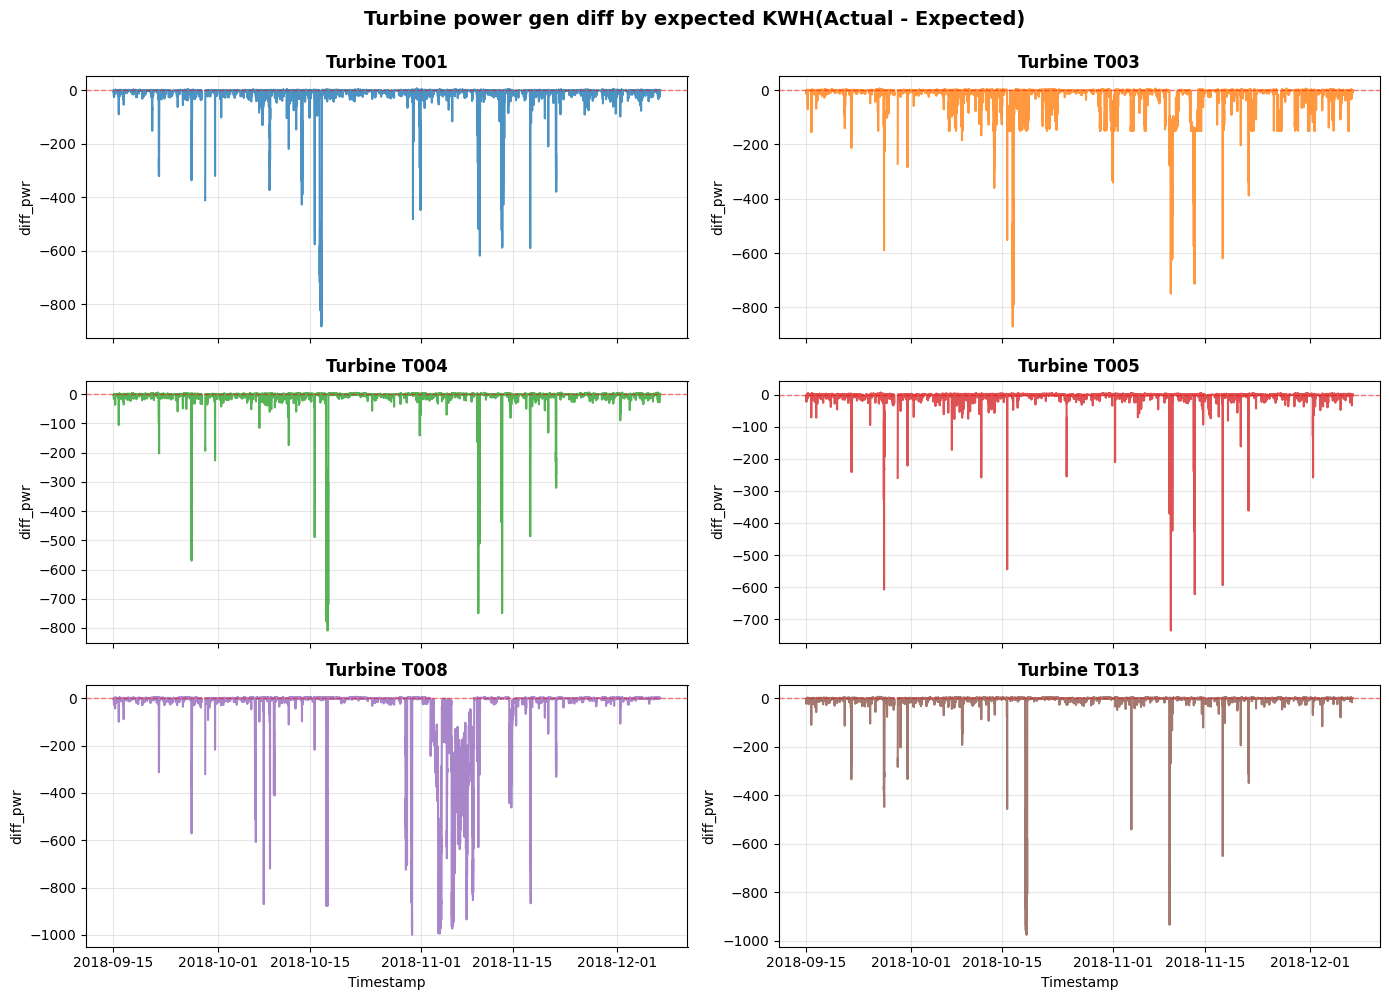

,TURBINE_ID,TTimeStamp,Gen_RPM_Avg,Gen_Bear_Temp_Avg,Gen_Phase1_Temp_Avg,Gen_Phase2_Temp_Avg,Gen_Phase3_Temp_Avg,Amb_WindSpeed_Max,Amb_WindSpeed_Min,Amb_WindSpeed_Avg,...,HCnt_Avg_TrbOk,HCnt_Avg_Run,HCnt_Avg_Gen1,HCnt_Avg_Gen2,HCnt_Avg_Yaw,HCnt_Avg_SrvOn,HCnt_Avg_AmbOk,HCnt_Avg_WindOk,Sys_Logs_FirstActAlarmNo,diff_pwr
0,T001,2018-09-15 00:10:00,131.1,35.0,35.0,35.0,35.0,2.4,1.6,2.1,...,600.0,600.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,-5.068871
1,T001,2018-09-15 00:20:00,144.7,34.0,35.0,35.0,35.0,2.6,1.7,2.3,...,600.0,600.0,0.0,0.0,0.0,0.0,600.0,0.0,0.0,-5.068871
2,T001,2018-09-15 00:30:00,155.7,34.0,35.0,35.0,35.0,2.6,2.0,2.4,...,600.0,600.0,0.0,0.0,33.0,0.0,600.0,0.0,0.0,-3.966942
3,T001,2018-09-15 00:40:00,144.0,34.0,35.0,35.0,35.0,2.6,2.0,2.3,...,600.0,600.0,0.0,0.0,38.0,0.0,600.0,0.0,0.0,-3.911846
4,T001,2018-09-15 00:50:00,124.2,34.0,35.0,35.0,35.0,2.2,1.7,2.0,...,600.0,600.0,0.0,0.0,24.0,0.0,600.0,0.0,0.0,-3.856749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156437,T013,2018-12-07 13:00:00,1138.6,48.0,71.0,72.0,72.0,8.7,5.5,7.3,...,600.0,600.0,600.0,0.0,2.0,0.0,600.0,600.0,0.0,1.763085
156438,T013,2018-12-07 13:10:00,1060.1,48.0,70.0,71.0,71.0,8.1,5.3,6.8,...,600.0,600.0,600.0,0.0,0.0,0.0,600.0,600.0,0.0,0.055096
156439,T013,2018-12-07 13:20:00,1060.0,48.0,70.0,71.0,71.0,8.9,5.7,6.8,...,600.0,600.0,600.0,0.0,25.0,0.0,600.0,600.0,0.0,0.716253
156440,T013,2018-12-07 13:30:00,1044.3,48.0,70.0,72.0,71.0,8.4,5.3,6.7,...,600.0,600.0,600.0,0.0,0.0,0.0,600.0,600.0,0.0,0.165289


In [171]:
turbine_ids = ["T001", "T003", "T004", "T005", "T008", "T013"]
diff_column = "diff_pwr"
plot_difference_column(wind_crk_res, turbine_ids, diff_column, 
                          timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                          start_date=None, end_date=None,
                          figsize=(14, 10), ylabel=None, title="Turbine power gen diff by expected KWH(Actual - Expected)")

## Build a scanner to go through all anomaly detected on difference between Actual pwr and expected pwr, per turbine

In [172]:
wind_crk_diff = wind_crk_res[['TTimeStamp', 'TURBINE_ID','diff_pwr']].groupby(["TURBINE_ID", "TTimeStamp"])['diff_pwr'].mean().reset_index()  # select a subset for scanning
wind_crk_diff

,TURBINE_ID,TTimeStamp,diff_pwr
0,T001,2018-09-15 00:10:00,-5.068871
1,T001,2018-09-15 00:20:00,-5.068871
2,T001,2018-09-15 00:30:00,-3.966942
3,T001,2018-09-15 00:40:00,-3.911846
4,T001,2018-09-15 00:50:00,-3.856749
...,...,...,...
156437,T013,2018-12-07 13:00:00,1.763085
156438,T013,2018-12-07 13:10:00,0.055096
156439,T013,2018-12-07 13:20:00,0.716253
156440,T013,2018-12-07 13:30:00,0.165289


## Functions Tool

EXAMPLE 1: Both absolute threshold and deviation
ANOMALY DETECTION SUMMARY (Sequential Logic)
Total records analyzed: 156442

Step 1 - Absolute threshold (|diff_pwr| > 100.0):
  Records passing: 6208 (3.97%)

Step 2 - Deviation check (on records from Step 1):
  Records passing: 2664 (42.91% of Step 1)

BOTH criteria met (Final anomalies): 2664 (1.70% of total)

Parameters:
  - Absolute threshold: 100.0
  - Deviation threshold: 2.0
  - Deviation method: std

Anomalies by turbine:
  Turbine T008: 900 anomalies (7.48%)
  Turbine T002: 523 anomalies (4.35%)
  Turbine T003: 523 anomalies (4.35%)
  Turbine T006: 327 anomalies (2.72%)
  Turbine T007: 146 anomalies (1.21%)
  Turbine T001: 68 anomalies (0.57%)
  Turbine T009: 62 anomalies (0.52%)
  Turbine T012: 42 anomalies (0.35%)
  Turbine T011: 34 anomalies (0.28%)
  Turbine T013: 15 anomalies (0.12%)
  Turbine T004: 13 anomalies (0.11%)
  Turbine T005: 8 anomalies (0.07%)
  Turbine T010: 3 anomalies (0.02%)


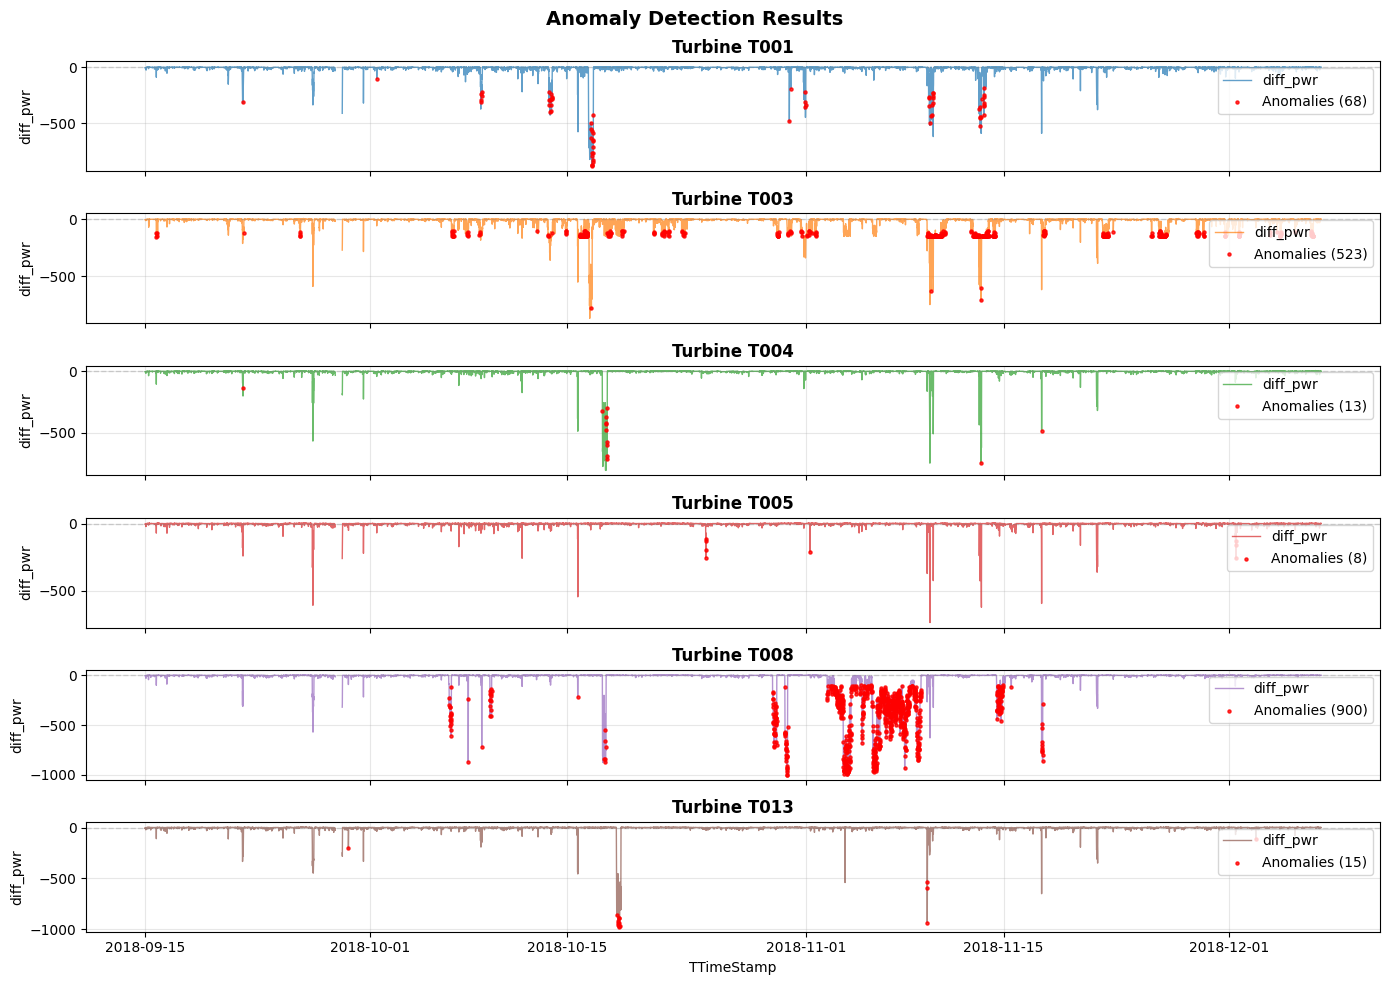

TOP 20 ANOMALIES (by absolute value)
TURBINE_ID          TTimeStamp     diff_pwr    detection
      T007 2018-11-30 18:40:00 -1013.168044 -1013.168044
      T007 2018-10-15 18:50:00 -1012.947658 -1012.947658
      T007 2018-10-15 18:40:00 -1012.892562 -1012.892562
      T007 2018-10-15 19:00:00 -1010.137741 -1010.137741
      T012 2018-10-15 18:40:00 -1008.264463 -1008.264463
      T007 2018-11-30 18:50:00 -1007.438017 -1007.438017
      T007 2018-10-15 19:10:00 -1007.382920 -1007.382920
      T012 2018-10-15 18:50:00 -1006.721763 -1006.721763
      T007 2018-11-30 19:50:00 -1005.179063 -1005.179063
      T007 2018-10-15 19:50:00 -1004.848485 -1004.848485
      T007 2018-10-15 19:40:00 -1004.848485 -1004.848485
      T007 2018-11-30 20:00:00 -1003.801653 -1003.801653
      T011 2018-10-18 17:10:00 -1002.424242 -1002.424242
      T007 2018-11-30 19:40:00 -1000.385675 -1000.385675
      T007 2018-10-15 20:30:00 -1000.055096 -1000.055096
      T011 2018-10-18 19:50:00 -1000.055096 -1000.0

In [178]:
def scan_turbine_anomalies(df, timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                          value_col='diff_pwr', abs_threshold=None, 
                          deviation_threshold=2.0, deviation_method='std'):
    """
    Scan time series data to detect anomalies using sequential criteria:
    1. FIRST: Check if |diff_pwr| > abs_threshold
    2. THEN: If step 1 passes, check if value deviates from other turbines at same timestamp
    3. BOTH must be true to mark as anomaly
    
    Parameters:
    -----------
    df : pandas DataFrame
        dataset with columns: TURBINE_ID, TTimeStamp, diff_pwr
    timestamp_col : str
        Name of the timestamp column
    turbine_col : str
        Name of the turbine ID column
    value_col : str
        Name of the value column to analyze (e.g., 'diff_pwr')
    abs_threshold : float, optional
        Absolute value threshold. Values where |diff_pwr| > threshold are flagged.
        If None, only deviation-based detection is used.
    deviation_threshold : float
        Number of standard deviations (or MAD) from median to consider anomalous.
        Default: 2.0
    deviation_method : str
        Method for deviation calculation:
        - 'std': Use standard deviation from mean
        - 'mad': Use Median Absolute Deviation from median (more robust)
    
    Returns:
    --------
    Returns:
    --------
    df_detection : DataFrame with columns [TURBINE_ID, TTimeStamp, detection]
        - detection = 0 if either criterion not met
        - detection = diff_pwr value if BOTH criteria met
    anomaly_stats : dict with statistics about detected anomalies
    """
    df = df.copy()
    df[timestamp_col] = pd.to_datetime(df[timestamp_col])
    df = df.sort_values([timestamp_col, turbine_col])
    
    # Initialize detection column
    df['detection'] = 0.0
    
    anomaly_count = 0
    abs_threshold_pass = 0
    deviation_pass = 0
    both_criteria_met = 0
    
    # Group by timestamp to compare across turbines
    for timestamp, group in df.groupby(timestamp_col):
        turbine_values = group.set_index(turbine_col)[value_col]
        abs_values = turbine_values.abs()
        
        for turbine_id in turbine_values.index:
            value = turbine_values.loc[turbine_id]
            abs_value = abs(value)
            
            # STEP 1: Check absolute threshold
            if abs_value <= abs_threshold:
                # Failed first check, set detection to 0 and continue
                mask = (df[timestamp_col] == timestamp) & (df[turbine_col] == turbine_id)
                df.loc[mask, 'detection'] = 0.0
                continue
            
            # Passed step 1
            abs_threshold_pass += 1
            
            # STEP 2: Check deviation from other turbines at same timestamp
            passes_deviation = False
            
            if len(abs_values) > 1:  # Need at least 2 turbines to compare
                if deviation_method == 'mad':
                    # Use median and Median Absolute Deviation (more robust)
                    median_val = abs_values.median()
                    mad = (abs_values - median_val).abs().median()
                    if mad > 0:
                        # Modified z-score
                        modified_z = abs((abs_value - median_val) / (1.4826 * mad))
                        if modified_z > deviation_threshold:
                            passes_deviation = True
                    elif abs_value > median_val:
                        # If MAD is 0 (all values same), check if this one is different
                        passes_deviation = True
                
                elif deviation_method == 'std':
                    # Use mean and standard deviation
                    mean_val = abs_values.mean()
                    std_val = abs_values.std()
                    if std_val > 0:
                        z_score = abs((abs_value - mean_val) / std_val)
                        if z_score > deviation_threshold:
                            passes_deviation = True
                    elif abs_value > mean_val:
                        passes_deviation = True
                
            else:
                # Only one turbine at this timestamp, can't compare
                # You can choose to either:
                # Option A: Mark as anomaly since absolute threshold is met
                passes_deviation = True
                # Option B: Don't mark as anomaly since we can't verify deviation
                # passes_deviation = False
            
            if passes_deviation:
                deviation_pass += 1
            
            # BOTH criteria must be met
            if passes_deviation:
                mask = (df[timestamp_col] == timestamp) & (df[turbine_col] == turbine_id)
                df.loc[mask, 'detection'] = value
                both_criteria_met += 1
            else:
                mask = (df[timestamp_col] == timestamp) & (df[turbine_col] == turbine_id)
                df.loc[mask, 'detection'] = 0.0
    
    # Create output dataframe
    df_detection = df[[turbine_col, timestamp_col, 'detection']].copy()
    
    # Calculate statistics
    total_records = len(df)
    anomaly_stats = {
        'total_records': total_records,
        'abs_threshold_pass': abs_threshold_pass,
        'deviation_pass': deviation_pass,
        'both_criteria_met': both_criteria_met,
        'anomaly_percentage': (both_criteria_met / total_records * 100) if total_records > 0 else 0,
        'parameters': {
            'abs_threshold': abs_threshold,
            'deviation_threshold': deviation_threshold,
            'deviation_method': deviation_method
        }
    }
    
    # Print summary
    print("=" * 80)
    print("ANOMALY DETECTION SUMMARY (Sequential Logic)")
    print("=" * 80)
    print(f"Total records analyzed: {total_records}")
    print()
    print(f"Step 1 - Absolute threshold (|diff_pwr| > {abs_threshold}):")
    print(f"  Records passing: {abs_threshold_pass} ({abs_threshold_pass/total_records*100:.2f}%)")
    print()
    print(f"Step 2 - Deviation check (on records from Step 1):")
    print(f"  Records passing: {deviation_pass} ({deviation_pass/abs_threshold_pass*100:.2f}% of Step 1)" if abs_threshold_pass > 0 else "  Records passing: 0")
    print()
    print(f"BOTH criteria met (Final anomalies): {both_criteria_met} ({both_criteria_met/total_records*100:.2f}% of total)")
    print()
    print(f"Parameters:")
    print(f"  - Absolute threshold: {abs_threshold}")
    print(f"  - Deviation threshold: {deviation_threshold}")
    print(f"  - Deviation method: {deviation_method}")
    
    # Anomalies by turbine
    anomalies_by_turbine = df_detection[df_detection['detection'] != 0].groupby(turbine_col).size()
    if len(anomalies_by_turbine) > 0:
        print()
        print("Anomalies by turbine:")
        for turbine_id, count in anomalies_by_turbine.sort_values(ascending=False).items():
            pct = (count / len(df[df[turbine_col] == turbine_id]) * 100)
            print(f"  Turbine {turbine_id}: {count} anomalies ({pct:.2f}%)")
    else:
        print()
        print("No anomalies detected with current thresholds.")
    
    return df_detection, anomaly_stats


# Helper function: Visualize anomalies for specific turbines
def visualize_anomalies(df_original, df_detection, turbine_ids,
                       timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                       value_col='diff_pwr', figsize=(14, 10)):
    """
    Visualize the original values and detected anomalies for selected turbines.
    """
    import matplotlib.pyplot as plt
    
    n_turbines = len(turbine_ids)
    n_cols = 1
    n_rows = n_turbines
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize, sharex=True)
    if n_turbines == 1:
        axes = [axes]
    
    # Get consistent colors
    colors = plt.cm.tab10(range(len(turbine_ids)))
    color_map = dict(zip(sorted(turbine_ids), colors))
    
    for idx, turbine_id in enumerate(sorted(turbine_ids)):
        # Get data for this turbine
        turbine_original = df_original[df_original[turbine_col] == turbine_id].sort_values(timestamp_col)
        turbine_detection = df_detection[df_detection[turbine_col] == turbine_id].sort_values(timestamp_col)
        
        # Plot original values
        axes[idx].plot(turbine_original[timestamp_col], turbine_original[value_col],
                      color=color_map[turbine_id], linewidth=1, alpha=0.7,
                      label='diff_pwr')
        
        # Highlight anomalies
        anomalies = turbine_detection[turbine_detection['detection'] != 0]
        if len(anomalies) > 0:
            axes[idx].scatter(anomalies[timestamp_col], anomalies['detection'],
                            color='red', s=5, zorder=5, alpha=0.8,
                            label=f'Anomalies ({len(anomalies)})')
        
        axes[idx].axhline(y=0, color='gray', linestyle='--', alpha=0.3, linewidth=1)
        axes[idx].set_title(f'Turbine {turbine_id}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel(value_col, fontsize=10)
        axes[idx].grid(True, alpha=0.3)
        axes[idx].legend(loc='upper right')
    
    axes[-1].set_xlabel(timestamp_col, fontsize=10)
    fig.suptitle('Anomaly Detection Results', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


# Helper function: Get detailed anomaly report
def get_anomaly_report(df_original, df_detection, 
                      timestamp_col='TTimeStamp', turbine_col='TURBINE_ID',
                      value_col='diff_pwr', top_n=20):
    """
    Get detailed report of detected anomalies.
    """
    # Merge to get original values
    anomalies = df_detection[df_detection['detection'] != 0].copy()
    anomalies = anomalies.merge(
        df_original[[turbine_col, timestamp_col, value_col]],
        on=[turbine_col, timestamp_col],
        how='left'
    )
    
    # Sort by absolute value of detection
    anomalies['abs_detection'] = anomalies['detection'].abs()
    anomalies = anomalies.sort_values('abs_detection', ascending=False)
    
    print("=" * 80)
    print(f"TOP {top_n} ANOMALIES (by absolute value)")
    print("=" * 80)
    
    display_cols = [turbine_col, timestamp_col, value_col, 'detection']
    print(anomalies[display_cols].head(top_n).to_string(index=False))
    
    return anomalies


# Helper function: Find timestamps with multiple turbine anomalies
def find_synchronized_anomalies(df_detection, timestamp_col='TTimeStamp',
                               turbine_col='TURBINE_ID', min_turbines=2):
    """
    Find timestamps where multiple turbines have anomalies simultaneously.
    """
    anomalies = df_detection[df_detection['detection'] != 0].copy()
    
    # Count anomalies per timestamp
    anomaly_counts = anomalies.groupby(timestamp_col).size()
    synchronized = anomaly_counts[anomaly_counts >= min_turbines]
    
    if len(synchronized) > 0:
        print("=" * 80)
        print(f"SYNCHRONIZED ANOMALIES ({min_turbines}+ turbines)")
        print("=" * 80)
        
        for timestamp in synchronized.index:
            turbines_at_time = anomalies[anomalies[timestamp_col] == timestamp]
            print(f"\nTimestamp: {timestamp}")
            print(f"  Turbines affected: {len(turbines_at_time)}")
            print(turbines_at_time[[turbine_col, 'detection']].to_string(index=False))
    else:
        print(f"No synchronized anomalies found ({min_turbines}+ turbines)")
    
    return synchronized


# Usage examples:

    
# Example 1: Basic anomaly detection with both criteria
print("=" * 80)
print("Absolute threshold and deviation")
print("=" * 80)
df_detection, stats = scan_turbine_anomalies(
    wind_crk_diff,
    abs_threshold=100.0,      # Flag if |diff_pwr| > 100
    deviation_threshold=2.0,  # Flag if 2+ std deviations from mean
    deviation_method='std'
)


# Visualize results for selected turbines
visualize_anomalies(wind_crk_diff, df_detection, turbine_ids=turbine_ids) #turbine_ids=["T001", "T003", "T004", "T005", "T008", "T013"]

# Get detailed report
anomaly_details = get_anomaly_report(wind_crk_diff, df_detection, top_n=20)

# Find synchronized anomalies
synchronized = find_synchronized_anomalies(df_detection, min_turbines=3)

# Save results
#df_detection.to_csv('anomaly_detection_results.csv', index=False)
#print("\n Detection results saved to 'anomaly_detection_results.csv'")

# Export only anomalies
#anomalies_only = df_detection[df_detection['detection'] != 0]
#anomalies_only.to_csv('anomalies_only.csv', index=False)
#print("\n Anomalies saved to 'anomalies_only.csv'")

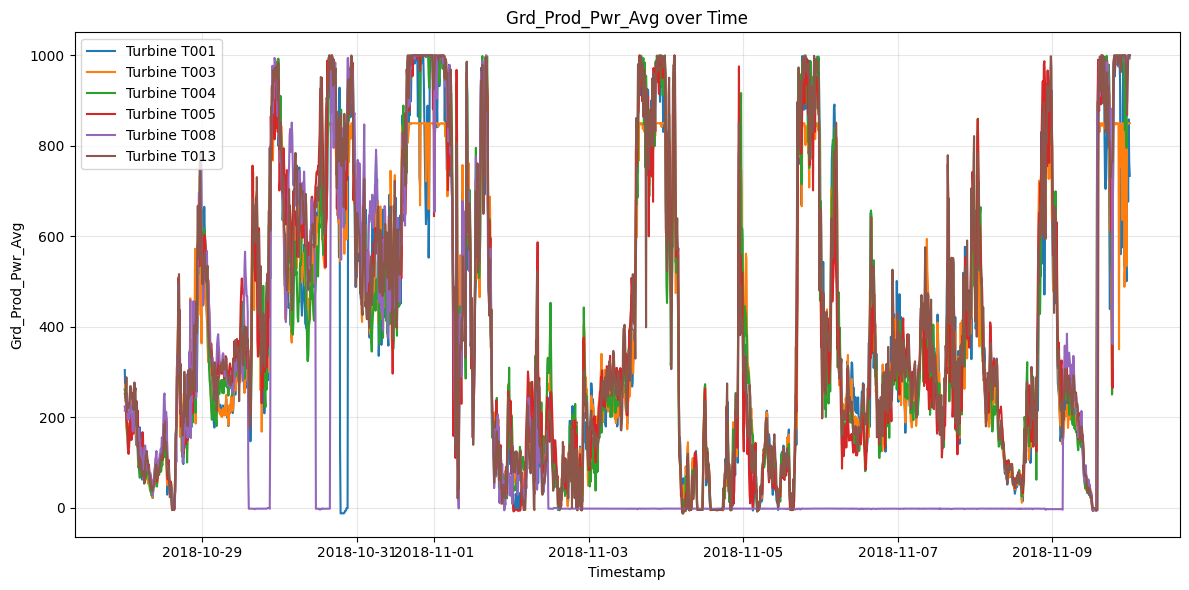

In [200]:
# check wind speeds around some anomalies timestamps of particular turbines
start_date = '2018-10-28'
end_date = '2018-11-10'
turbine_list = ["T001","T003","T004", "T005", "T008", "T013"]
df_filtered = wind_crk_res[(wind_crk_res['TTimeStamp'] >= start_date) & (wind_crk_res['TTimeStamp'] <= end_date) & (wind_crk_res["TURBINE_ID"].isin(turbine_list))]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

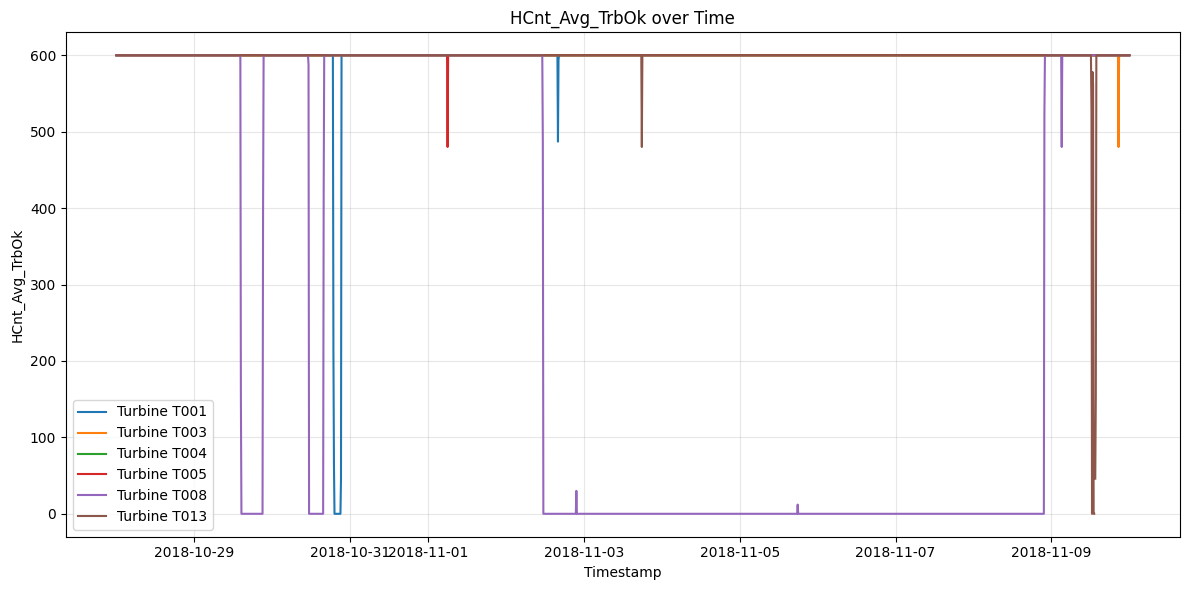

In [201]:
plot_timeseries(df_filtered, "HCnt_Avg_TrbOk") # Turbine not ok and missing counter values

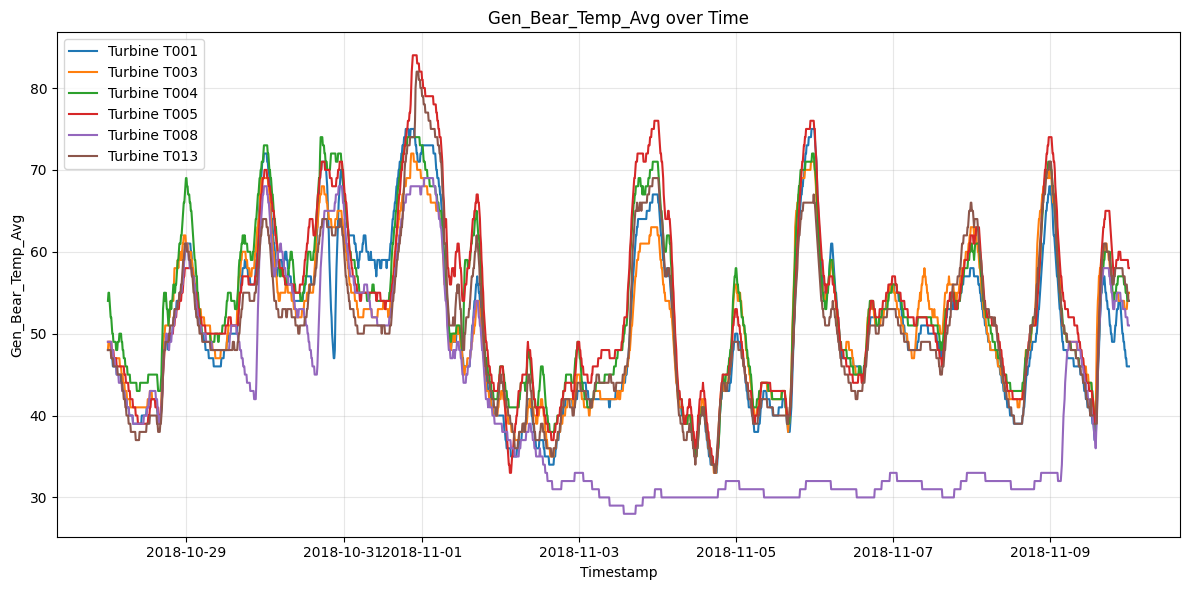

In [189]:
plot_timeseries(df_filtered, "Gen_Bear_Temp_Avg") # Likely some male function of the turbine??

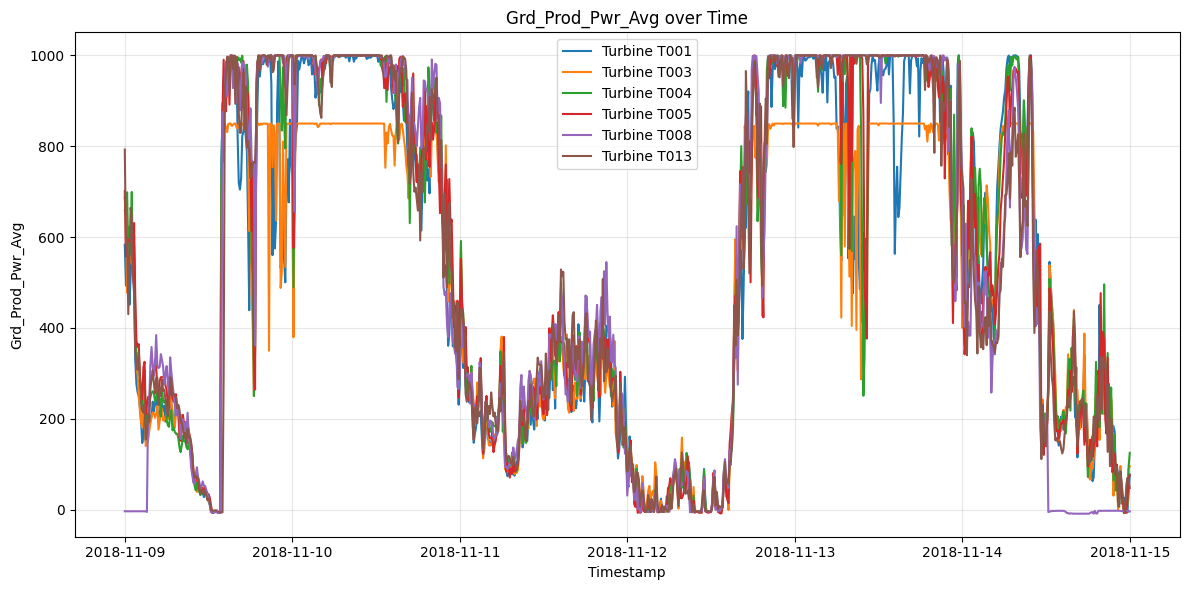

In [192]:
start_date = '2018-11-09'
end_date = '2018-11-15'
turbine_list = ["T001","T003","T004", "T005", "T008", "T013"]
df_filtered = wind_crk_res[(wind_crk_res['TTimeStamp'] >= start_date) & (wind_crk_res['TTimeStamp'] <= end_date) & (wind_crk_res["TURBINE_ID"].isin(turbine_list))]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

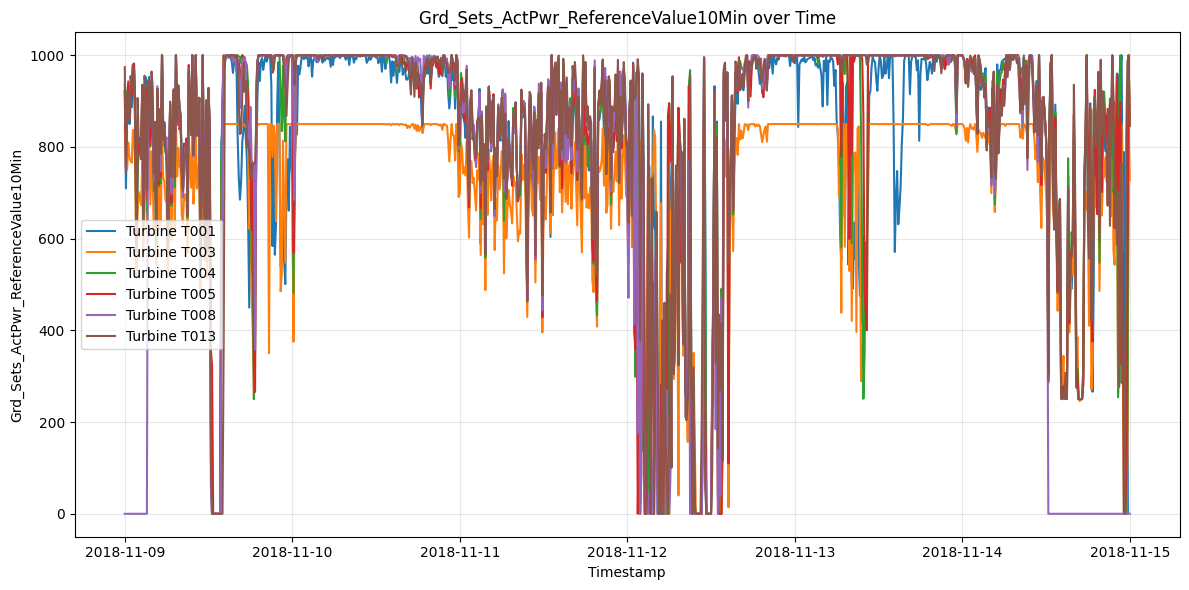

In [193]:
plot_timeseries(df_filtered, "Grd_Sets_ActPwr_ReferenceValue10Min") # Curtailment in effect of T003

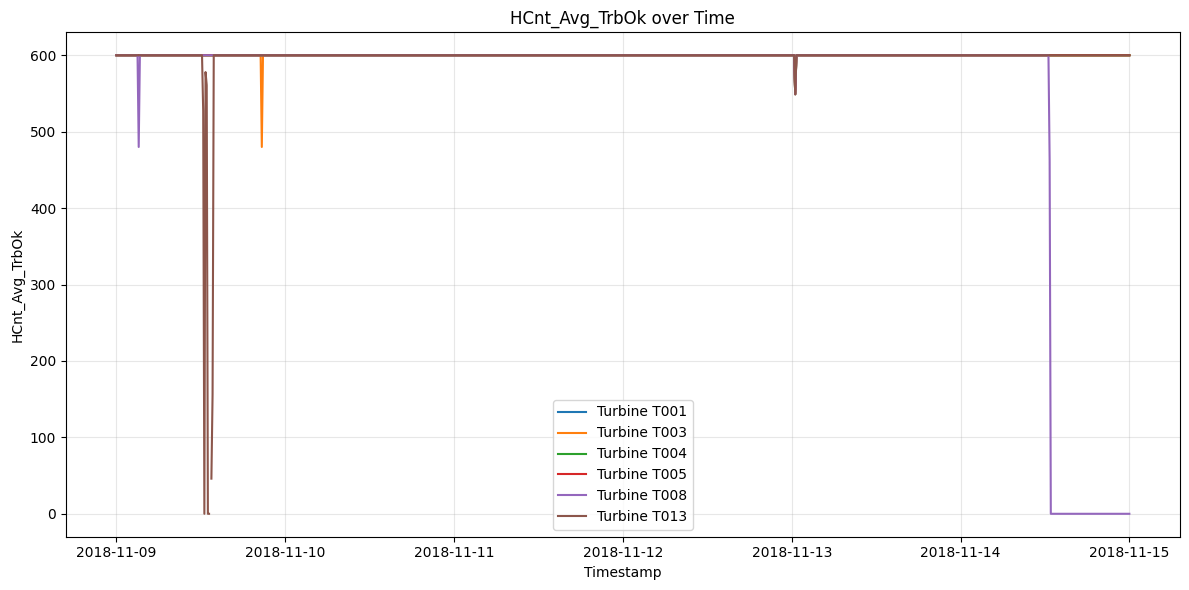

In [194]:
plot_timeseries(df_filtered, "HCnt_Avg_TrbOk") # Turbine not ok and missing counter values

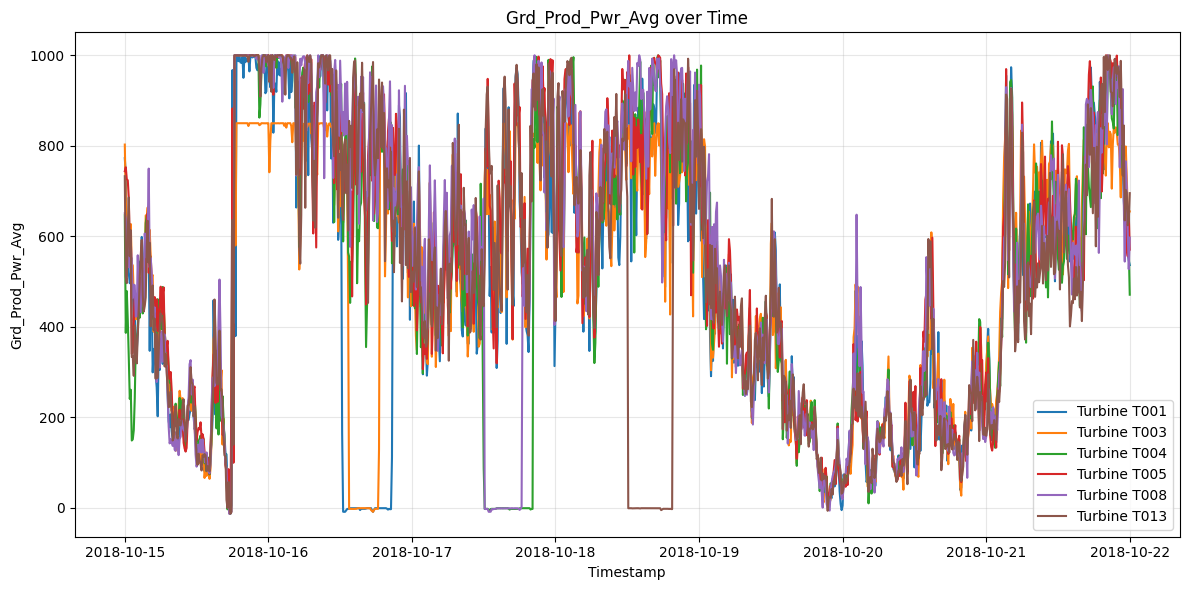

In [202]:
start_date = '2018-10-15'
end_date = '2018-10-22'
turbine_list = ["T001","T003","T004", "T005", "T008", "T013"]
df_filtered = wind_crk_res[(wind_crk_res['TTimeStamp'] >= start_date) & (wind_crk_res['TTimeStamp'] <= end_date) & (wind_crk_res["TURBINE_ID"].isin(turbine_list))]
plot_timeseries(df_filtered, "Grd_Prod_Pwr_Avg")

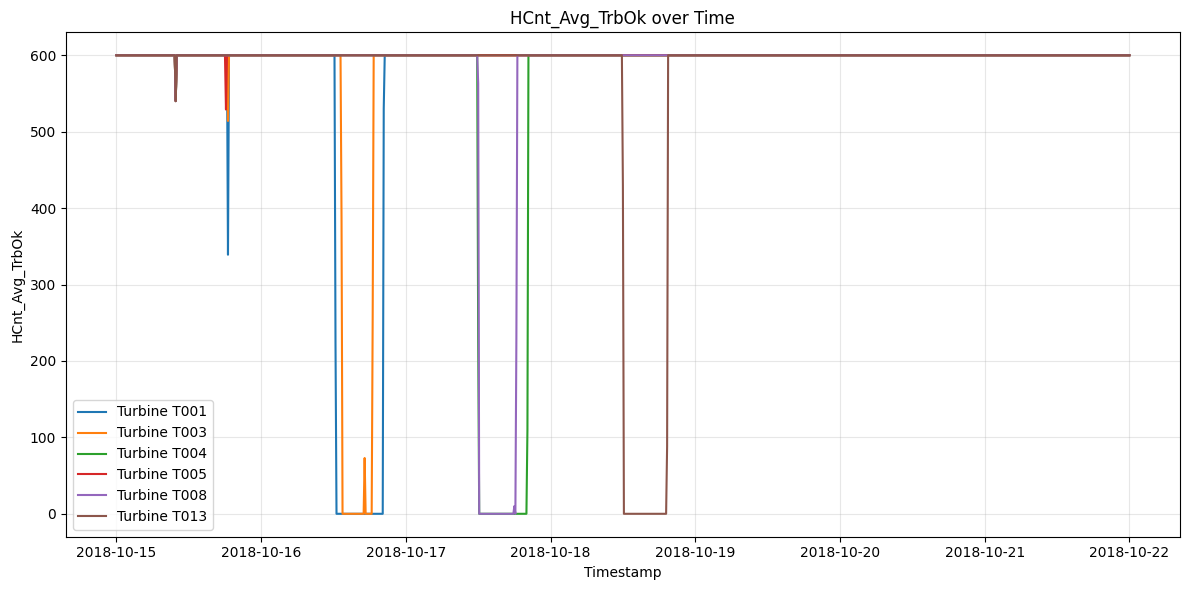

In [204]:
plot_timeseries(df_filtered, "HCnt_Avg_TrbOk") # turbine not ok and missing counter values

In [35]:
desc

,TURBINE_ID,Turbine ID
0,TTimeStamp,Timestamp
1,Gen_RPM_Avg,Generator Speed (rpm)
2,Gen_Bear_Temp_Avg,Generator bearing temperature
3,Gen_Phase1_Temp_Avg,Generator Phase 1 temperature
4,Gen_Phase2_Temp_Avg,Generator Phase 2 temperature
5,Gen_Phase3_Temp_Avg,Generator Phase 3 temperature
6,Amb_WindSpeed_Max,Ambient Windspeed Max
7,Amb_WindSpeed_Min,Ambient Windspeed Min
8,Amb_WindSpeed_Avg,Ambient Windspeed Avg
9,Amb_WindDir_Abs_Avg,Ambient WindDirection Avg
